In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn
rcParams['figure.figsize'] = 20, 12


Bad key "text.kerning_factor" on line 4 in
C:\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
import h2o
    
# h2o 시작하기 
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 13.0.2+8, mixed mode, sharing)
  Starting server from C:\anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\kt347\AppData\Local\Temp\tmp6f2urvep
  JVM stdout: C:\Users\kt347\AppData\Local\Temp\tmp6f2urvep\h2o_kt347_started_from_python.out
  JVM stderr: C:\Users\kt347\AppData\Local\Temp\tmp6f2urvep\h2o_kt347_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Asia/Seoul
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.3
H2O_cluster_version_age:,1 month and 16 days
H2O_cluster_name:,H2O_from_python_kt347_0d7rok
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.988 Gb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"accepting new members, healthy"


In [3]:
ecg_data = h2o.import_file("http://h2o-public-test-data.s3.amazonaws.com/smalldata/anomaly/ecg_discord_test.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [4]:
ecg_data.head()

C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,C80,C81,C82,C83,C84,C85,C86,C87,C88,C89,C90,C91,C92,C93,C94,C95,C96,C97,C98,C99,C100,C101,C102,C103,C104,C105,C106,C107,C108,C109,C110,C111,C112,C113,C114,C115,C116,C117,C118,C119,C120,C121,C122,C123,C124,C125,C126,C127,C128,C129,C130,C131,C132,C133,C134,C135,C136,C137,C138,C139,C140,C141,C142,C143,C144,C145,C146,C147,C148,C149,C150,C151,C152,C153,C154,C155,C156,C157,C158,C159,C160,C161,C162,C163,C164,C165,C166,C167,C168,C169,C170,C171,C172,C173,C174,C175,C176,C177,C178,C179,C180,C181,C182,C183,C184,C185,C186,C187,C188,C189,C190,C191,C192,C193,C194,C195,C196,C197,C198,C199,C200
2.1,2.13,2.19,2.28,2.44,2.62,2.8,3.04,3.36,3.69,3.97,4.24,4.53,4.8,5.02,5.21,5.4,5.57,5.71,5.79,5.86,5.92,5.98,6.02,6.06,6.08,6.14,6.18,6.22,6.27,6.32,6.35,6.38,6.45,6.49,6.53,6.57,6.64,6.7,6.73,6.78,6.83,6.88,6.92,6.94,6.98,7.01,7.03,7.05,7.06,7.07,7.08,7.06,7.04,7.03,6.99,6.94,6.88,6.83,6.77,6.69,6.6,6.53,6.45,6.36,6.27,6.19,6.11,6.03,5.94,5.88,5.81,5.75,5.68,5.62,5.61,5.54,5.49,5.45,5.42,5.38,5.34,5.31,5.3,5.29,5.26,5.23,5.23,5.22,5.2,5.19,5.18,5.19,5.17,5.15,5.14,5.17,5.16,5.15,5.15,5.15,5.14,5.14,5.14,5.15,5.14,5.14,5.13,5.15,5.15,5.15,5.14,5.16,5.15,5.15,5.14,5.14,5.15,5.15,5.14,5.13,5.14,5.14,5.11,5.12,5.12,5.12,5.09,5.09,5.09,5.1,5.08,5.08,5.08,5.08,5.06,5.05,5.06,5.07,5.05,5.03,5.03,5.04,5.03,5.01,5.01,5.02,5.01,5.01,5,5,5.02,5.01,4.98,5,5,5,4.99,5,5.01,5.02,5.01,5.03,5.03,5.02,5.02,5.04,5.04,5.04,5.02,5.02,5.01,4.99,4.98,4.96,4.96,4.96,4.94,4.93,4.93,4.93,4.93,4.93,5.02,5.27,5.8,5.94,5.58,5.39,5.32,5.25,5.21,5.13,4.97,4.71,4.39,4.05,3.69,3.32,3.05
2.06,2.05,2.06,2.07,2.08,2.13,2.22,2.37,2.53,2.71,2.97,3.31,3.65,3.96,4.27,4.37,4.82,5.04,5.24,5.43,5.59,5.7,5.76,5.83,5.9,5.94,5.97,6.04,6.08,6.12,6.16,6.22,6.26,6.31,6.33,6.38,6.45,6.49,6.51,6.56,6.58,6.68,6.71,6.75,6.81,6.85,6.89,6.91,6.96,6.99,7.01,7.01,7.03,7.04,7.05,7.01,6.99,6.97,6.92,6.86,6.8,6.75,6.67,6.57,6.5,6.47,6.33,6.25,6.15,6.09,6.01,5.93,5.84,5.78,5.72,5.65,5.58,5.53,5.5,5.44,5.38,5.36,5.33,5.3,5.25,5.24,5.23,5.21,5.18,5.17,5.17,5.15,5.14,5.12,5.12,5.12,5.11,5.09,5.11,5.11,5.09,5.08,5.09,5.09,5.08,5.08,5.09,5.09,5.1,5.08,5.09,5.11,5.1,5.09,5.09,5.1,5.1,5.08,5.09,5.11,5.09,5.08,5.08,5.08,5.09,5.08,5.07,5.07,5.07,5.08,5.05,5.05,5.06,5.05,5.04,5.03,5.04,5.04,5.02,5.01,5,5.01,5,4.99,4.99,4.99,4.98,4.96,4.98,4.98,4.98,4.96,4.97,4.97,4.96,4.95,4.95,4.97,4.96,4.94,4.94,4.96,4.96,4.94,4.94,4.94,4.94,4.93,4.92,4.93,4.94,4.93,4.92,4.94,4.94,4.93,4.93,4.94,4.95,4.96,4.96,4.98,4.98,4.97,4.96,4.95,5,5.18,5.62,5.85,5.81,5.33,5.25,5.16,5.08,4.93,4.73,4.49,4.2,3.89
2.05,2.05,2.03,2.02,2.03,2.04,2.08,2.14,2.28,2.44,2.65,2.89,3.19,3.5,3.82,4.13,4.41,4.68,4.92,5.14,5.34,5.51,5.63,5.7,5.75,5.81,5.87,5.91,5.94,5.98,6,6.05,6.09,6.11,6.16,6.2,6.23,6.26,6.32,6.35,6.38,6.42,6.47,6.52,6.55,6.58,6.62,6.67,6.69,6.71,6.74,6.77,6.79,6.8,6.8,6.81,6.82,6.79,6.77,6.75,6.71,6.66,6.6,6.56,6.5,6.41,6.33,6.26,6.18,6.09,6,5.93,5.85,5.77,5.69,5.63,5.58,5.52,5.45,5.41,5.41,5.35,5.3,5.27,5.26,5.24,5.2,5.18,5.18,5.17,5.15,5.14,5.14,5.14,5.14,5.12,5.11,5.13,5.12,5.1,5.1,5.12,5.12,5.12,5.12,5.13,5.13,5.11,5.12,5.13,5.13,5.12,5.1,5.12,5.12,5.12,5.11,5.12,5.13,5.11,5.1,5.1,5.12,5.11,5.08,5.08,5.09,5.08,5.07,5.07,5.07,5.07,5.06,5.05,5.06,5.05,5.05,5.03,5.04,5.04,5.02,5.01,5.02,5.02,5.01,5,5,5,5.01,4.98,4.99,4.99,4.99,4.98,4.97,4.97,4.98,4.98,4.97,4.99,4.97,4.96,4.96,4.97,4.97,4.96,4.95,4.95,4.97,4.97,4.95,4.96,4.96,4.96,4.95,4.95,4.96,4.96,4.94,4.94,4.94,4.96,4.96,4.95,4.98,4.98,5.05,5.33,5.82,5.81,5.48,5.36,5.33,5.28,5.24,5.13,4.98,4.73,4.4,4.07
2.07,2.04,2.03,2.05,2.05,2.04,2.05,2.09,2.14,2.22,2.35,2.53,2.76,3.04,3.36,3.69,4,4.32,4.6,4.86,4.94,5.31,5.51,5.65,5.75,5.81,5.85,5.9,5.95,5.99,6.02,6.06,6.09,6.13,6.16,6.18,6.23,6.25,6

In [5]:
ecg_data.shape

(23, 210)

In [6]:
ecg_data.types

{'C1': 'real',
 'C2': 'real',
 'C3': 'real',
 'C4': 'real',
 'C5': 'real',
 'C6': 'real',
 'C7': 'real',
 'C8': 'real',
 'C9': 'real',
 'C10': 'real',
 'C11': 'real',
 'C12': 'real',
 'C13': 'real',
 'C14': 'real',
 'C15': 'real',
 'C16': 'real',
 'C17': 'real',
 'C18': 'real',
 'C19': 'real',
 'C20': 'real',
 'C21': 'real',
 'C22': 'real',
 'C23': 'real',
 'C24': 'real',
 'C25': 'real',
 'C26': 'real',
 'C27': 'real',
 'C28': 'real',
 'C29': 'real',
 'C30': 'real',
 'C31': 'real',
 'C32': 'real',
 'C33': 'real',
 'C34': 'real',
 'C35': 'real',
 'C36': 'real',
 'C37': 'real',
 'C38': 'real',
 'C39': 'real',
 'C40': 'real',
 'C41': 'real',
 'C42': 'real',
 'C43': 'real',
 'C44': 'real',
 'C45': 'real',
 'C46': 'real',
 'C47': 'real',
 'C48': 'real',
 'C49': 'real',
 'C50': 'real',
 'C51': 'real',
 'C52': 'real',
 'C53': 'real',
 'C54': 'real',
 'C55': 'real',
 'C56': 'real',
 'C57': 'real',
 'C58': 'real',
 'C59': 'real',
 'C60': 'real',
 'C61': 'real',
 'C62': 'real',
 'C63': 'real',
 

In [7]:
train_ecg = ecg_data[:20:, :]
test_ecg = ecg_data[:23, :]

In [8]:
train_ecg

C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,C80,C81,C82,C83,C84,C85,C86,C87,C88,C89,C90,C91,C92,C93,C94,C95,C96,C97,C98,C99,C100,C101,C102,C103,C104,C105,C106,C107,C108,C109,C110,C111,C112,C113,C114,C115,C116,C117,C118,C119,C120,C121,C122,C123,C124,C125,C126,C127,C128,C129,C130,C131,C132,C133,C134,C135,C136,C137,C138,C139,C140,C141,C142,C143,C144,C145,C146,C147,C148,C149,C150,C151,C152,C153,C154,C155,C156,C157,C158,C159,C160,C161,C162,C163,C164,C165,C166,C167,C168,C169,C170,C171,C172,C173,C174,C175,C176,C177,C178,C179,C180,C181,C182,C183,C184,C185,C186,C187,C188,C189,C190,C191,C192,C193,C194,C195,C196,C197,C198,C199,C200,C201,C202,C203,C204,C205,C206,C207,C208,C209,C210
2.1,2.13,2.19,2.28,2.44,2.62,2.8,3.04,3.36,3.69,3.97,4.24,4.53,4.8,5.02,5.21,5.4,5.57,5.71,5.79,5.86,5.92,5.98,6.02,6.06,6.08,6.14,6.18,6.22,6.27,6.32,6.35,6.38,6.45,6.49,6.53,6.57,6.64,6.7,6.73,6.78,6.83,6.88,6.92,6.94,6.98,7.01,7.03,7.05,7.06,7.07,7.08,7.06,7.04,7.03,6.99,6.94,6.88,6.83,6.77,6.69,6.6,6.53,6.45,6.36,6.27,6.19,6.11,6.03,5.94,5.88,5.81,5.75,5.68,5.62,5.61,5.54,5.49,5.45,5.42,5.38,5.34,5.31,5.3,5.29,5.26,5.23,5.23,5.22,5.2,5.19,5.18,5.19,5.17,5.15,5.14,5.17,5.16,5.15,5.15,5.15,5.14,5.14,5.14,5.15,5.14,5.14,5.13,5.15,5.15,5.15,5.14,5.16,5.15,5.15,5.14,5.14,5.15,5.15,5.14,5.13,5.14,5.14,5.11,5.12,5.12,5.12,5.09,5.09,5.09,5.1,5.08,5.08,5.08,5.08,5.06,5.05,5.06,5.07,5.05,5.03,5.03,5.04,5.03,5.01,5.01,5.02,5.01,5.01,5,5,5.02,5.01,4.98,5,5,5,4.99,5,5.01,5.02,5.01,5.03,5.03,5.02,5.02,5.04,5.04,5.04,5.02,5.02,5.01,4.99,4.98,4.96,4.96,4.96,4.94,4.93,4.93,4.93,4.93,4.93,5.02,5.27,5.8,5.94,5.58,5.39,5.32,5.25,5.21,5.13,4.97,4.71,4.39,4.05,3.69,3.32,3.05,2.99,2.74,2.61,2.47,2.35,2.26,2.2,2.15,2.1,2.08
2.06,2.05,2.06,2.07,2.08,2.13,2.22,2.37,2.53,2.71,2.97,3.31,3.65,3.96,4.27,4.37,4.82,5.04,5.24,5.43,5.59,5.7,5.76,5.83,5.9,5.94,5.97,6.04,6.08,6.12,6.16,6.22,6.26,6.31,6.33,6.38,6.45,6.49,6.51,6.56,6.58,6.68,6.71,6.75,6.81,6.85,6.89,6.91,6.96,6.99,7.01,7.01,7.03,7.04,7.05,7.01,6.99,6.97,6.92,6.86,6.8,6.75,6.67,6.57,6.5,6.47,6.33,6.25,6.15,6.09,6.01,5.93,5.84,5.78,5.72,5.65,5.58,5.53,5.5,5.44,5.38,5.36,5.33,5.3,5.25,5.24,5.23,5.21,5.18,5.17,5.17,5.15,5.14,5.12,5.12,5.12,5.11,5.09,5.11,5.11,5.09,5.08,5.09,5.09,5.08,5.08,5.09,5.09,5.1,5.08,5.09,5.11,5.1,5.09,5.09,5.1,5.1,5.08,5.09,5.11,5.09,5.08,5.08,5.08,5.09,5.08,5.07,5.07,5.07,5.08,5.05,5.05,5.06,5.05,5.04,5.03,5.04,5.04,5.02,5.01,5,5.01,5,4.99,4.99,4.99,4.98,4.96,4.98,4.98,4.98,4.96,4.97,4.97,4.96,4.95,4.95,4.97,4.96,4.94,4.94,4.96,4.96,4.94,4.94,4.94,4.94,4.93,4.92,4.93,4.94,4.93,4.92,4.94,4.94,4.93,4.93,4.94,4.95,4.96,4.96,4.98,4.98,4.97,4.96,4.95,5,5.18,5.62,5.85,5.81,5.33,5.25,5.16,5.08,4.93,4.73,4.49,4.2,3.89,3.62,3.38,3.17,2.92,2.64,2.45,2.33,2.23,2.13,2.08
2.05,2.05,2.03,2.02,2.03,2.04,2.08,2.14,2.28,2.44,2.65,2.89,3.19,3.5,3.82,4.13,4.41,4.68,4.92,5.14,5.34,5.51,5.63,5.7,5.75,5.81,5.87,5.91,5.94,5.98,6,6.05,6.09,6.11,6.16,6.2,6.23,6.26,6.32,6.35,6.38,6.42,6.47,6.52,6.55,6.58,6.62,6.67,6.69,6.71,6.74,6.77,6.79,6.8,6.8,6.81,6.82,6.79,6.77,6.75,6.71,6.66,6.6,6.56,6.5,6.41,6.33,6.26,6.18,6.09,6,5.93,5.85,5.77,5.69,5.63,5.58,5.52,5.45,5.41,5.41,5.35,5.3,5.27,5.26,5.24,5.2,5.18,5.18,5.17,5.15,5.14,5.14,5.14,5.14,5.12,5.11,5.13,5.12,5.1,5.1,5.12,5.12,5.12,5.12,5.13,5.13,5.11,5.12,5.13,5.13,5.12,5.1,5.12,5.12,5.12,5.11,5.12,5.13,5.11,5.1,5.1,5.12,5.11,5.08,5.08,5.09,5.08,5.07,5.07,5.07,5.07,5.06,5.05,5.06,5.05,5.05,5.03,5.04,5.04,5.02,5.01,5.02,5.02,5.01,5,5,5,5.01,4.98,4.99,4.99,4.99,4.98,4.97,4.97,4.98,4.98,4.97,4.99,4.97,4.96,4.96,4.97,4.97,4.96,4.95,4.95,4.97,4.97,4.95,4.96,4.96,4.96,4.95,4.95,4.96,4.96,4.94,4.94,4.94,4.96,4.96,4.95,4.98,4.98,5.05,5.33,5.82,5.81,5.48,5.36,5.33,5.28,5.24,5.13,4.98,4.73,4.4,4.07,3.71,3.33,3.01,2.74,2.55,2.51,2.3,2.17

In [54]:
def plot_stacked_time_series(df, title):
    stacked = df.stack()
    stacked = stacked.reset_index()
    #total = [data[0].values for name,data in stacked.groupby('level_0')]
    total = [data[0].values for name,data in stacked.groupby('level_0')]
    
    #name,data = stacked.groupby('level_0')    
    
    pd.DataFrame({idx:pos for idx,pos in enumerate(total)}).plot(title=title)
    plt.legend(bbox_to_anchor=(1.05, 1))

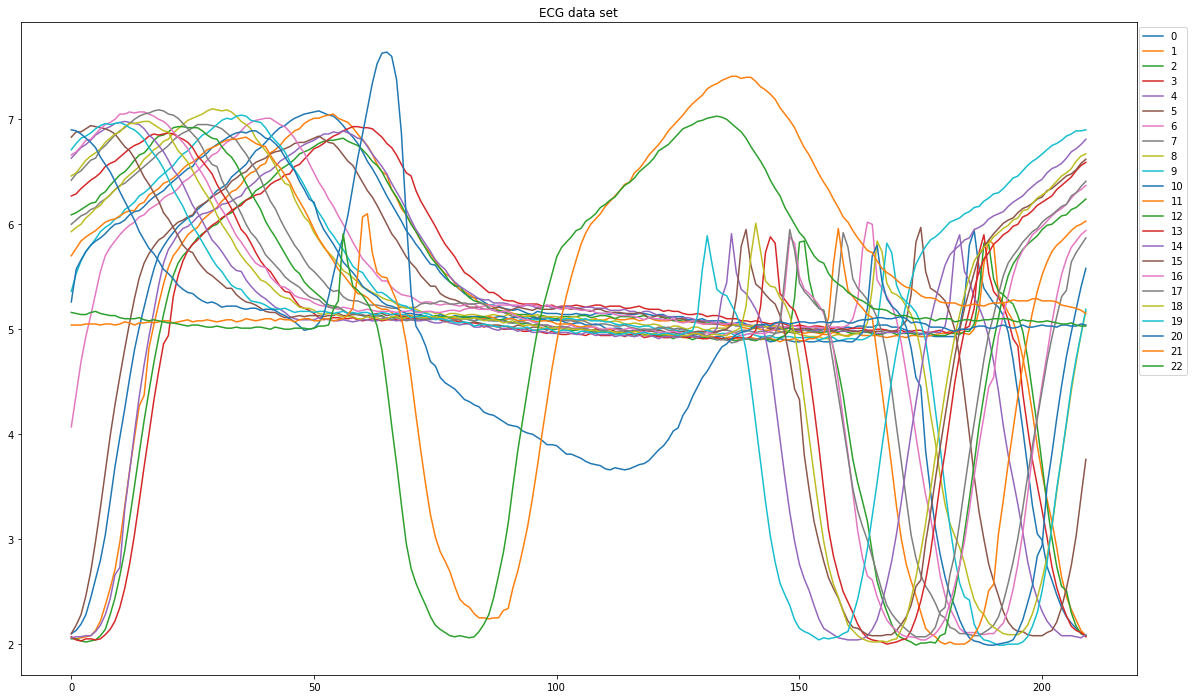

In [55]:
plot_stacked_time_series(ecg_data.as_data_frame(), "ECG data set")

In [17]:
stacked = ecg_data.as_data_frame().stack()

In [19]:
stacked = stacked.reset_index()

In [21]:
total = [data[0].values for name,data in stacked.groupby('level_0')]

In [23]:
total

[array([2.1 , 2.13, 2.19, 2.28, 2.44, 2.62, 2.8 , 3.04, 3.36, 3.69, 3.97,
        4.24, 4.53, 4.8 , 5.02, 5.21, 5.4 , 5.57, 5.71, 5.79, 5.86, 5.92,
        5.98, 6.02, 6.06, 6.08, 6.14, 6.18, 6.22, 6.27, 6.32, 6.35, 6.38,
        6.45, 6.49, 6.53, 6.57, 6.64, 6.7 , 6.73, 6.78, 6.83, 6.88, 6.92,
        6.94, 6.98, 7.01, 7.03, 7.05, 7.06, 7.07, 7.08, 7.06, 7.04, 7.03,
        6.99, 6.94, 6.88, 6.83, 6.77, 6.69, 6.6 , 6.53, 6.45, 6.36, 6.27,
        6.19, 6.11, 6.03, 5.94, 5.88, 5.81, 5.75, 5.68, 5.62, 5.61, 5.54,
        5.49, 5.45, 5.42, 5.38, 5.34, 5.31, 5.3 , 5.29, 5.26, 5.23, 5.23,
        5.22, 5.2 , 5.19, 5.18, 5.19, 5.17, 5.15, 5.14, 5.17, 5.16, 5.15,
        5.15, 5.15, 5.14, 5.14, 5.14, 5.15, 5.14, 5.14, 5.13, 5.15, 5.15,
        5.15, 5.14, 5.16, 5.15, 5.15, 5.14, 5.14, 5.15, 5.15, 5.14, 5.13,
        5.14, 5.14, 5.11, 5.12, 5.12, 5.12, 5.09, 5.09, 5.09, 5.1 , 5.08,
        5.08, 5.08, 5.08, 5.06, 5.05, 5.06, 5.07, 5.05, 5.03, 5.03, 5.04,
        5.03, 5.01, 5.01, 5.02, 5.01, 

In [28]:
title = "ECG data set"

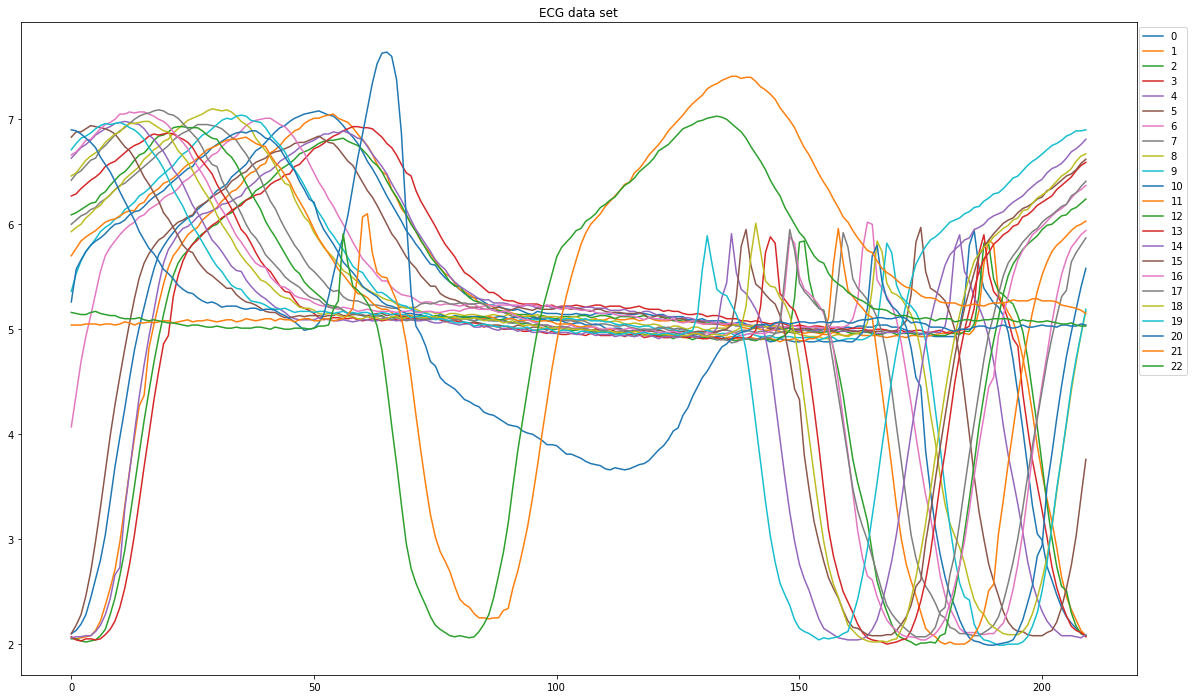

In [29]:
pd.DataFrame({idx:pos for idx,pos in enumerate(total)}).plot(title=title)
plt.legend(bbox_to_anchor=(1.05, 1))

In [31]:
from matplotlib import cm

def plot_bidimensional(model, test, recon_error, layer, title):

    bidimensional_data = model.deepfeatures(test, layer).cbind(recon_error).as_data_frame()

    cmap = cm.get_cmap('Spectral')

    fig, ax = plt.subplots()
    bidimensional_data.plot(kind='scatter', 
                            x='DF.L{}.C1'.format(layer+1), 
                            y='DF.L{}.C2'.format(layer+1), 
                            s = 500,
                            c = 'Reconstruction.MSE',
                            title = title,
                            ax = ax,
                            colormap=cmap)
    layer_column = 'DF.L{}.C'.format(layer + 1)
    columns = [layer_column + '1', layer_column + '2']
    for k, v in bidimensional_data[columns].iterrows():
        ax.annotate(k, v, size=20, verticalalignment='bottom', horizontalalignment='left')
    fig.canvas.draw()

In [33]:
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator

In [34]:
seed = 13

In [37]:
model = H2OAutoEncoderEstimator(
    
    activation = 'Tanh',
    hidden = [50,20,2,20,50],
    epochs = 100,
    
    seed = seed,
    reproducible = True   

)

In [40]:
model.train(x = train_ecg.names,
           training_frame = train_ecg)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [41]:
recon_error = model.anomaly(test_ecg)

In [42]:
recon_error 

Reconstruction.MSE
0.00623389
0.011385
0.00776176
0.0149175
0.004455
0.0137914
0.0224174
0.00956061
0.0148398
0.0153535


deepfeatures progress: |██████████████████████████████████████████████████| 100%


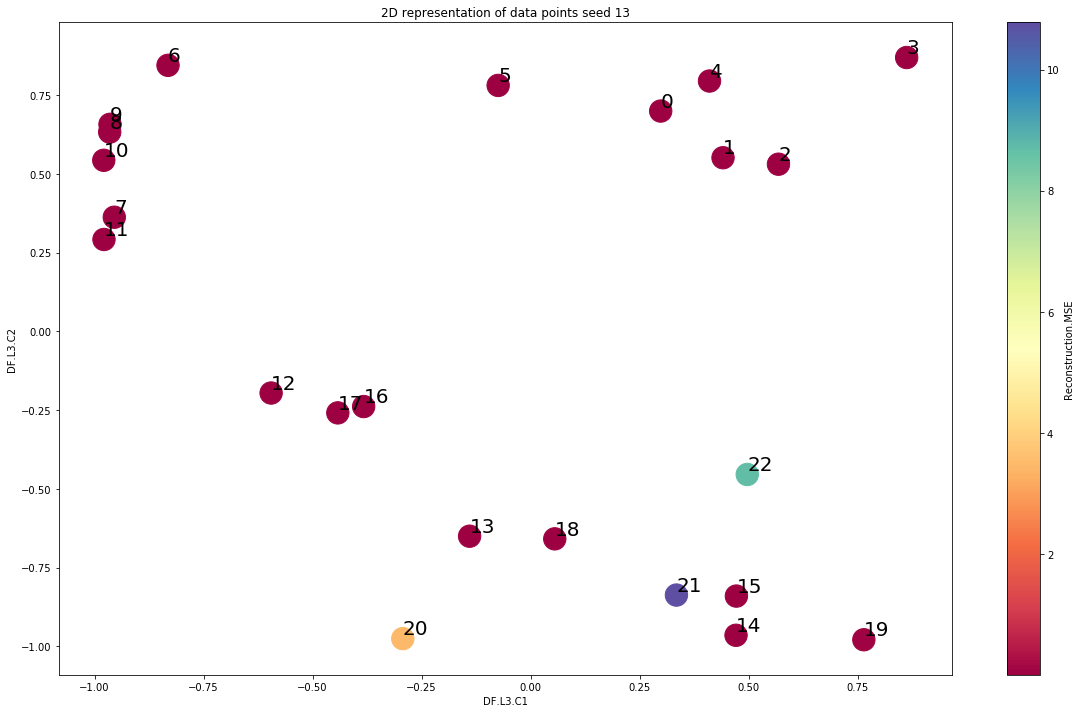

In [43]:
plot_bidimensional(model, test_ecg, recon_error, 2,"2D representation of data points seed {}".format(seed))

deeplearning prediction progress: |███████████████████████████████████████| 100%


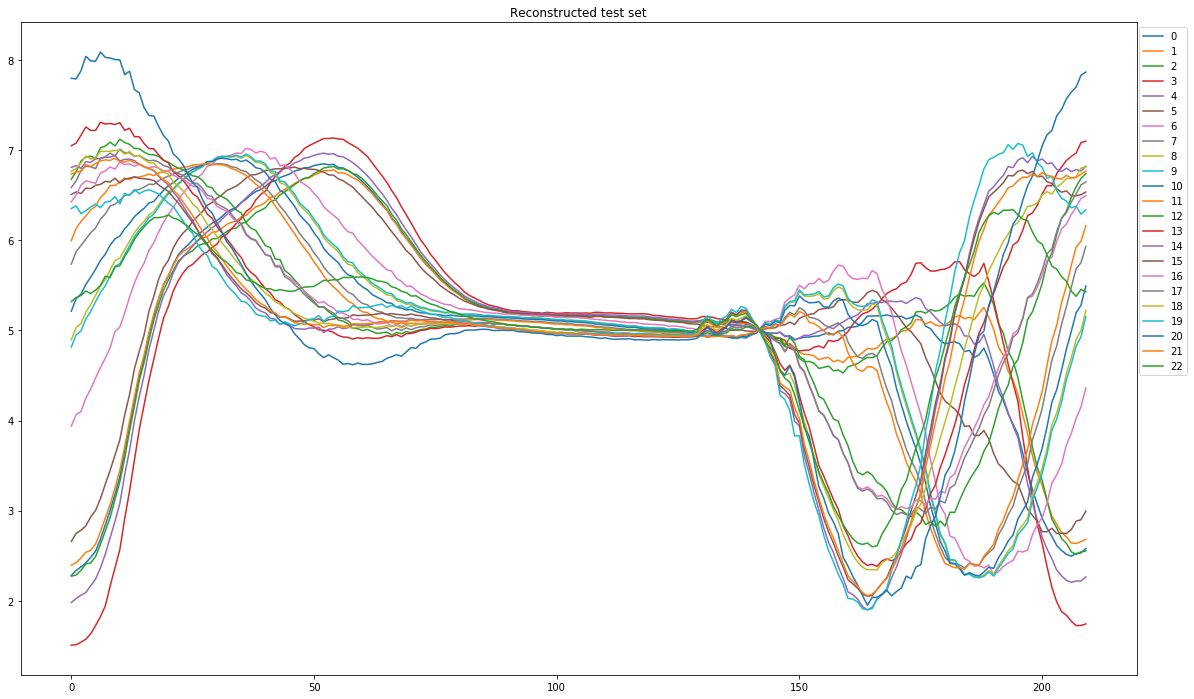

In [56]:
plot_stacked_time_series(model.predict(ecg_data).as_data_frame(), "Reconstructed test set")

In [57]:
model

Model Details
H2OAutoEncoderEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1605334847202_1


Status of Neuron Layers: auto-encoder, gaussian distribution, Quadratic loss, 23,432 weights/biases, 333.3 KB, 2,000 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,210,Input,0,,,,,,,,,
1,,2,50,Tanh,0,0,0,0.0122953,0.00724091,0,0.000250408,0.0928178,0.0089579,0.058529
2,,3,20,Tanh,0,0,0,0.00482538,0.00297469,0,-0.00522936,0.173641,-0.000630893,0.0384373
3,,4,2,Tanh,0,0,0,0.000866748,0.000430381,0,0.0313942,0.272898,0.0207167,0.00728057
4,,5,20,Tanh,0,0,0,0.00198535,0.000770162,0,-0.0122942,0.331821,0.0147792,0.0598402
5,,6,50,Tanh,0,0,0,0.00710221,0.00368947,0,-0.00281189,0.176792,-0.0034903,0.0539832
6,,7,210,Tanh,,0,0,0.0176758,0.0130113,0,0.00204033,0.0985724,0.00156336,0.026776




ModelMetricsAutoEncoder: deeplearning
** Reported on train data. **

MSE: 0.01590059768104137
RMSE: 0.1260975720664017

Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_mse
0,,2020-11-14 15:40:00,0.542 sec,0.00000 obs/sec,0.0,0,0.0,0.331177,0.109678
1,,2020-11-14 15:40:00,0.645 sec,206 obs/sec,1.0,1,20.0,0.294185,0.086545
2,,2020-11-14 15:40:00,0.704 sec,300 obs/sec,2.0,2,40.0,0.189118,0.035765
3,,2020-11-14 15:40:00,0.800 sec,266 obs/sec,3.0,3,60.0,0.161983,0.026238
4,,2020-11-14 15:40:00,0.821 sec,329 obs/sec,4.0,4,80.0,0.148788,0.022138
5,,2020-11-14 15:40:00,0.846 sec,378 obs/sec,5.0,5,100.0,0.146947,0.021593
6,,2020-11-14 15:40:00,0.870 sec,421 obs/sec,6.0,6,120.0,0.139216,0.019381
7,,2020-11-14 15:40:00,0.892 sec,462 obs/sec,7.0,7,140.0,0.169062,0.028582
8,,2020-11-14 15:40:00,0.911 sec,501 obs/sec,8.0,8,160.0,0.140041,0.019611
9,,2020-11-14 15:40:00,0.929 sec,537 obs/sec,9.0,9,180.0,0.152827,0.023356



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,C4,1.000000,1.000000,0.005919
1,C186,0.980128,0.980128,0.005801
2,C61,0.939340,0.939340,0.005560
3,C91,0.939135,0.939135,0.005558
4,C150,0.934291,0.934291,0.005530
5,C49,0.929213,0.929213,0.005500
6,C129,0.924646,0.924646,0.005473
7,C175,0.920304,0.920304,0.005447
8,C88,0.916738,0.916738,0.005426
9,C152,0.909673,0.909673,0.005384



See the whole table with table.as_data_frame()


In [47]:
data

<Figure size 1440x864 with 0 Axes>

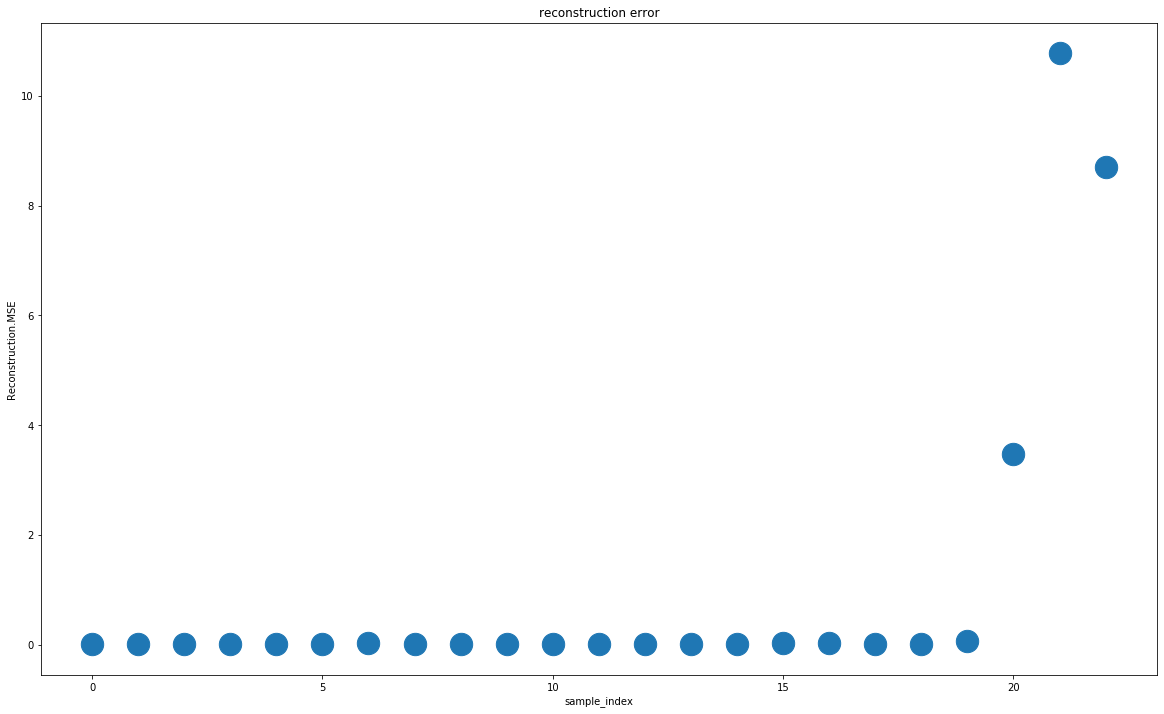

In [58]:
plt.figure()
df=recon_error.as_data_frame(True)
df["sample_index"]=df.index
df.plot(kind="scatter", x="sample_index", y="Reconstruction.MSE", 
        title = "reconstruction error", s = 500)

In [60]:
model.deepfeatures(train_ecg, 1).as_data_frame()#.plot(kind='scatter', x='DF.L2.C1', y='DF.L2.C2')

deepfeatures progress: |██████████████████████████████████████████████████| 100%


,DF.L2.C1,DF.L2.C2,DF.L2.C3,DF.L2.C4,DF.L2.C5,DF.L2.C6,DF.L2.C7,DF.L2.C8,DF.L2.C9,DF.L2.C10,DF.L2.C11,DF.L2.C12,DF.L2.C13,DF.L2.C14,DF.L2.C15,DF.L2.C16,DF.L2.C17,DF.L2.C18,DF.L2.C19,DF.L2.C20
0,-0.381806,0.340086,-0.778292,0.785579,0.629277,0.682537,0.725807,0.862029,-0.649210,-0.834853,0.196822,0.791717,-0.477317,-0.798725,0.028154,0.884040,0.067033,0.904775,0.827790,-0.797291
1,-0.051646,0.368896,-0.775479,0.817311,0.473631,0.692973,0.624224,0.892877,-0.609917,-0.802890,-0.074897,0.831149,-0.310648,-0.785927,0.068109,0.816814,0.291882,0.858302,0.882493,-0.872069
2,-0.015307,0.320860,-0.683562,0.847358,0.465899,0.724510,0.551800,0.887557,-0.506932,-0.790579,-0.024244,0.771348,-0.266892,-0.775645,0.029267,0.757186,0.304139,0.849874,0.893001,-0.887771
3,-0.655792,0.304309,0.313364,0.631837,0.729473,0.832660,0.686044,0.904093,-0.324491,-0.815208,0.340686,-0.005248,-0.451007,-0.828854,0.415725,0.385448,-0.236635,0.886062,0.795610,-0.774931
4,-0.504699,0.355007,-0.542322,0.744714,0.732365,0.765230,0.701661,0.904655,-0.596494,-0.796461,0.360759,0.690945,-0.478519,-0.822632,0.170402,0.859007,-0.061777,0.907881,0.833022,-0.700981
5,-0.389767,0.219205,-0.906673,0.618547,0.592852,0.696571,0.691190,0.830009,-0.747006,-0.851661,0.537873,0.838345,-0.350949,-0.706646,-0.141914,0.966519,-0.015114,0.893828,0.676020,-0.615895
6,-0.854787,-0.080767,-0.854687,-0.506920,0.681015,0.567330,0.863882,-0.152792,-0.740939,-0.741745,0.819350,0.512241,-0.225816,-0.146585,-0.415035,0.945270,-0.440337,0.498568,0.145739,0.258551
7,-0.846902,-0.253836,-0.521422,-0.929136,0.438668,0.018433,0.610340,-0.855830,-0.342401,-0.002257,0.717188,-0.187163,-0.079451,0.724821,-0.483022,0.538849,-0.604513,-0.665816,-0.477102,0.881164
8,-0.671299,0.283145,-0.936403,-0.806765,0.611890,-0.091105,0.547896,-0.727904,-0.752285,-0.515863,0.796892,0.513057,-0.286681,0.451407,-0.726691,0.867108,-0.623181,0.264895,-0.486393,0.683582
9,-0.526847,0.398693,-0.970586,-0.767904,0.469746,-0.039763,0.577070,-0.602909,-0.849533,-0.636297,0.791953,0.760138,-0.299937,0.459942,-0.769148,0.889507,-0.394392,0.327814,-0.179458,0.558449


deeplearning Model Build progress: |██████████████████████████████████████| 100%
deepfeatures progress: |██████████████████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deepfeatures progress: |██████████████████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deepfeatures progress: |██████████████████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deepfeatures progress: |██████████████████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deepfeatures progress: |██████████████████████████████████████████████████| 100%


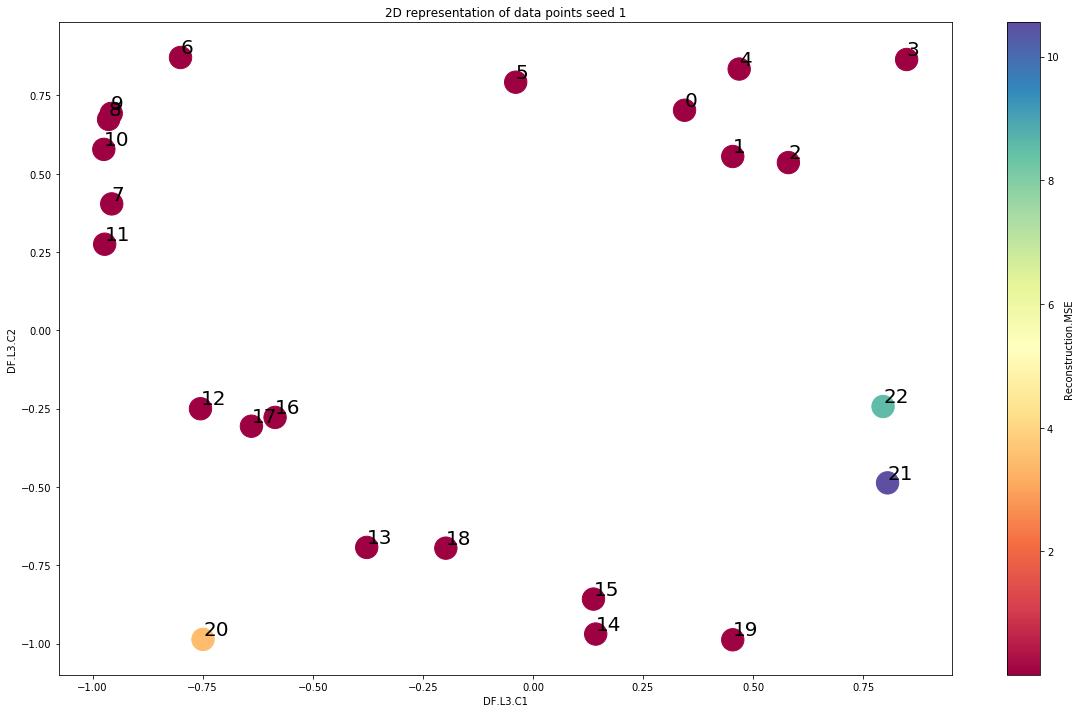

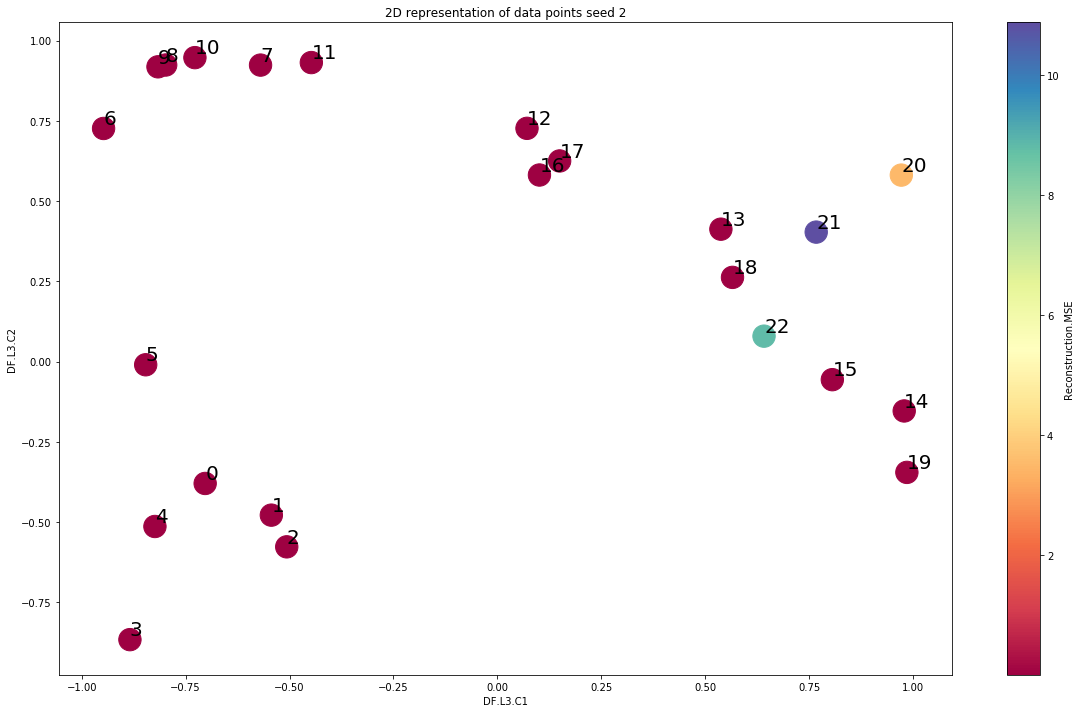

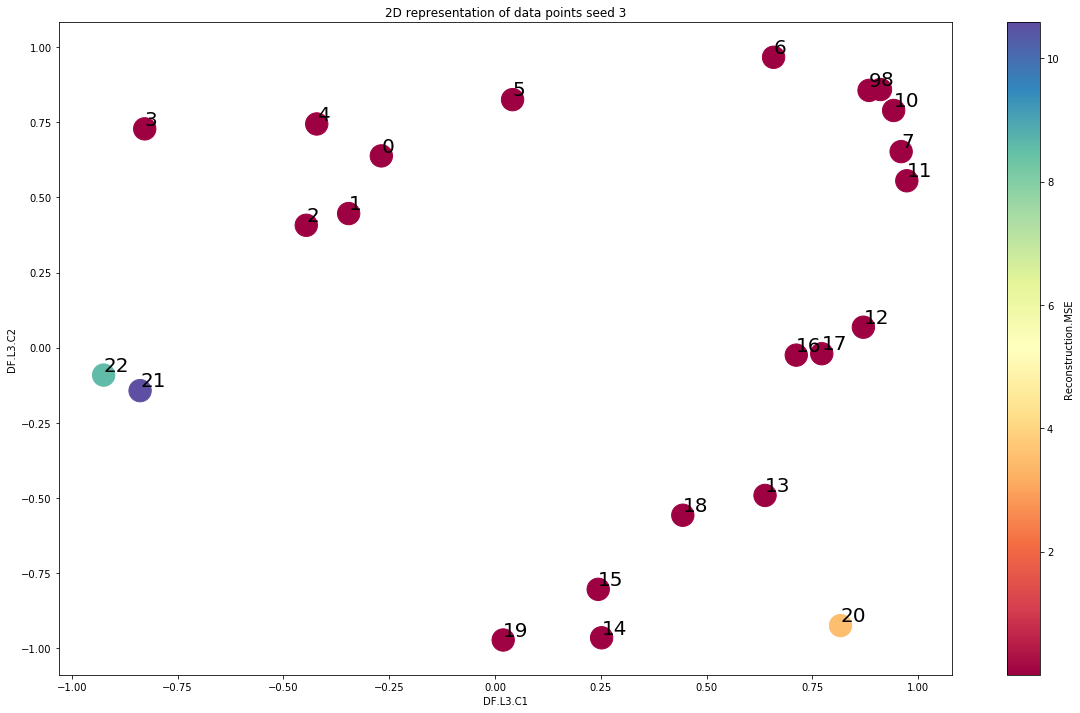

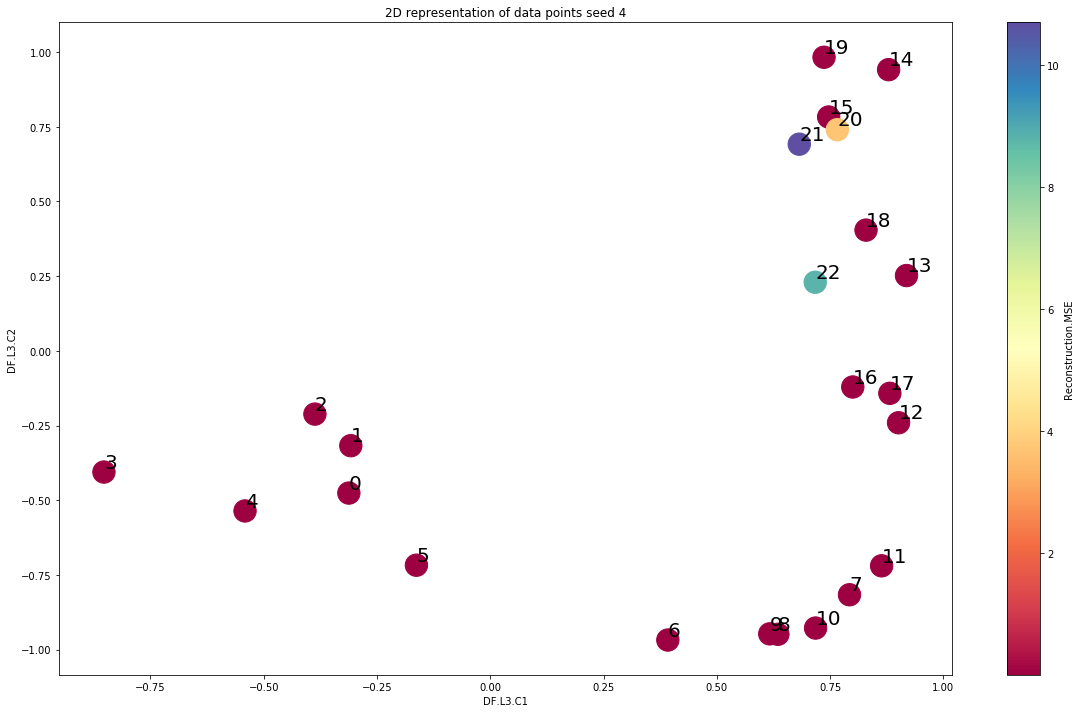

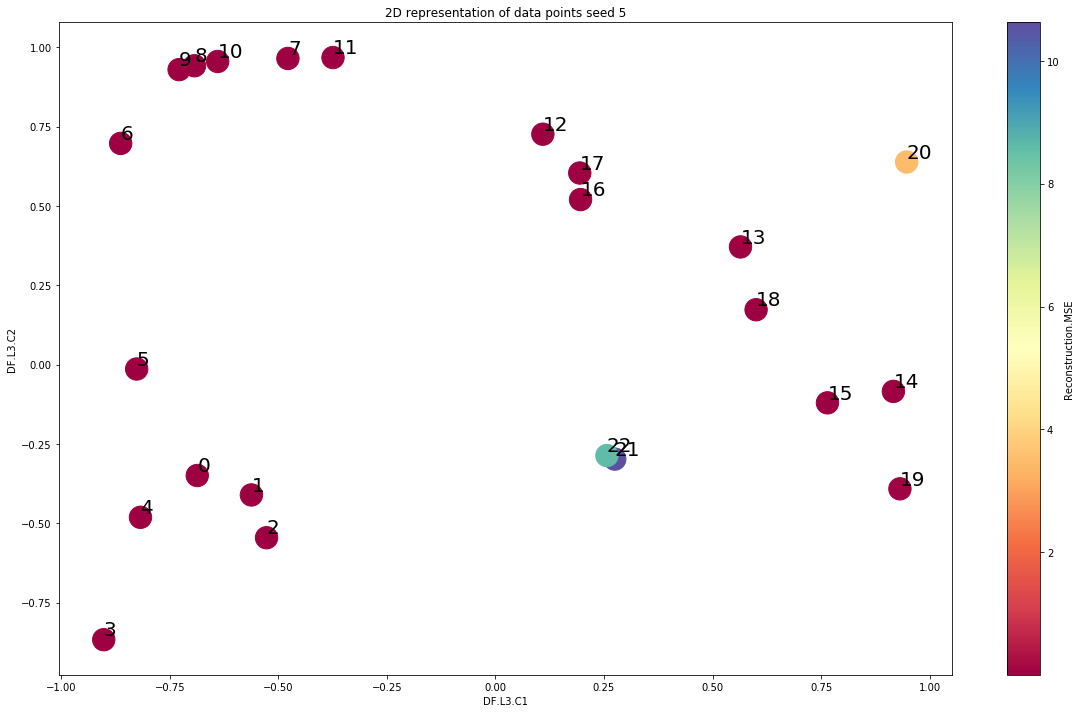

In [61]:
for seed in range(1, 6):
    model = H2OAutoEncoderEstimator(
        activation="Tanh",
        hidden=[50,20, 2, 20, 50],
        epochs=100,
        #sparse=True,
        #l1=1e-5,
        seed=seed,
        reproducible=True)
    model.train(
    x=train_ecg.names,
    training_frame=train_ecg)

    recon_error = model.anomaly(test_ecg)
    plot_bidimensional(model, test_ecg, recon_error, 2, "2D representation of data points seed {}".format(seed))
    # compute average and variance of the 2 dimensions


In [62]:
model = H2OAutoEncoderEstimator(
        activation="Tanh",
        hidden=[50,20, 10, 2, 10, 20, 50],
        epochs=100,
        #sparse=True,
        #l1=1e-5,
        seed=1,
        reproducible=True)
model.train(
    x=train_ecg.names,
    training_frame=train_ecg
)

recon_error = model.anomaly(test_ecg)
bidimensional_data = model.deepfeatures(test_ecg, 2).cbind(recon_error).as_data_frame()
bidimensional_data

deeplearning Model Build progress: |██████████████████████████████████████| 100%
deepfeatures progress: |██████████████████████████████████████████████████| 100%


,DF.L3.C1,DF.L3.C2,DF.L3.C3,DF.L3.C4,DF.L3.C5,DF.L3.C6,DF.L3.C7,DF.L3.C8,DF.L3.C9,DF.L3.C10,Reconstruction.MSE
0,-0.645048,0.975936,-0.641190,-0.778786,0.556080,0.882445,0.935447,0.680898,-0.397726,0.460614,0.006016
1,-0.695945,0.966941,-0.820887,-0.777154,0.857030,0.910312,0.949561,0.598948,-0.515304,0.610266,0.008344
2,-0.682764,0.966393,-0.773768,-0.783834,0.801877,0.881672,0.951039,0.511237,-0.500751,0.617635,0.005176
3,-0.245290,0.952996,-0.063004,-0.600784,-0.459146,0.293280,0.863435,0.240109,-0.454270,0.293864,0.013021
4,-0.369409,0.969648,-0.203017,-0.717675,-0.113851,0.722700,0.920387,0.546290,-0.250661,0.375998,0.004571
5,-0.314883,0.973317,0.180291,-0.786815,-0.265218,0.793832,0.913728,0.660221,0.093699,0.089549,0.011698
6,0.280367,0.795613,0.883144,-0.769384,-0.877036,0.627577,0.382424,0.572880,0.482378,-0.663854,0.021187
7,0.758810,-0.826228,0.909979,-0.196829,-0.438075,-0.260192,-0.811633,0.660658,0.729972,-0.734380,0.010593
8,0.499229,0.218354,0.903220,-0.595173,-0.445483,0.601578,-0.264712,0.720381,0.754582,-0.831893,0.007800
9,0.355474,0.434119,0.834809,-0.743294,0.158175,0.810961,0.277686,0.684024,0.695718,-0.757279,0.006542
